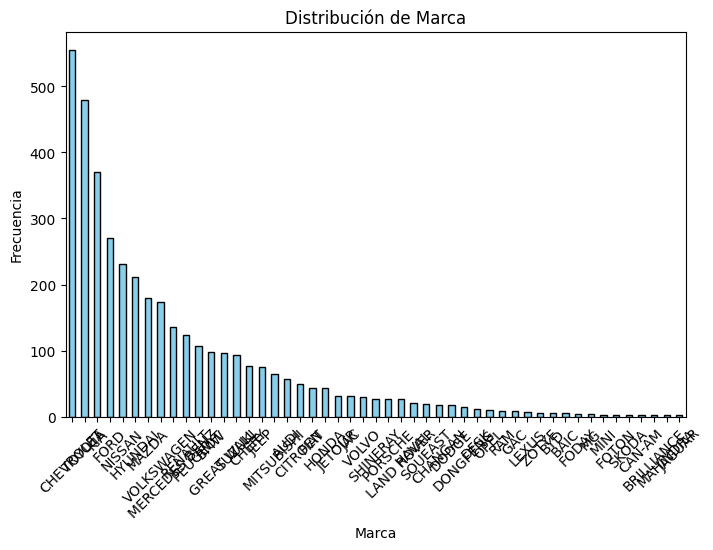

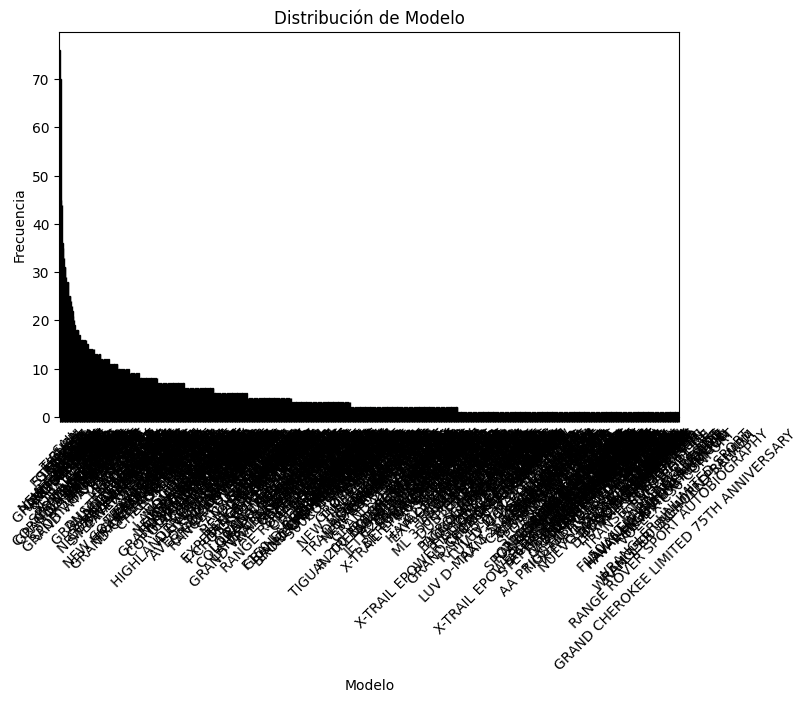

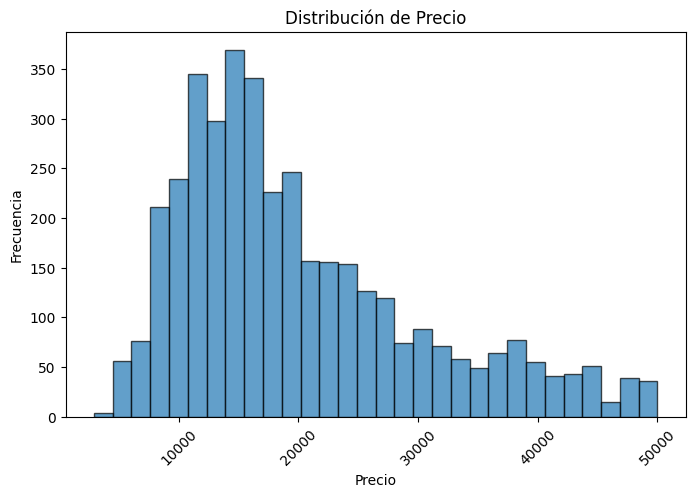

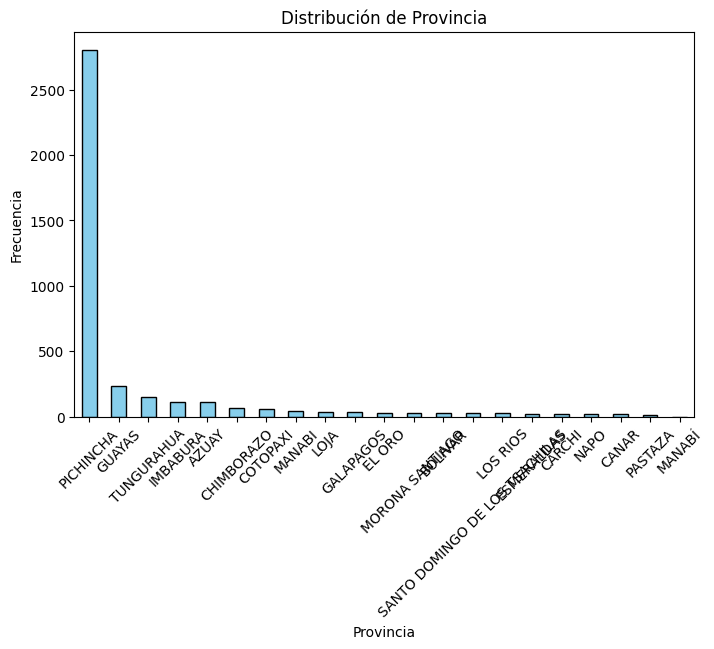

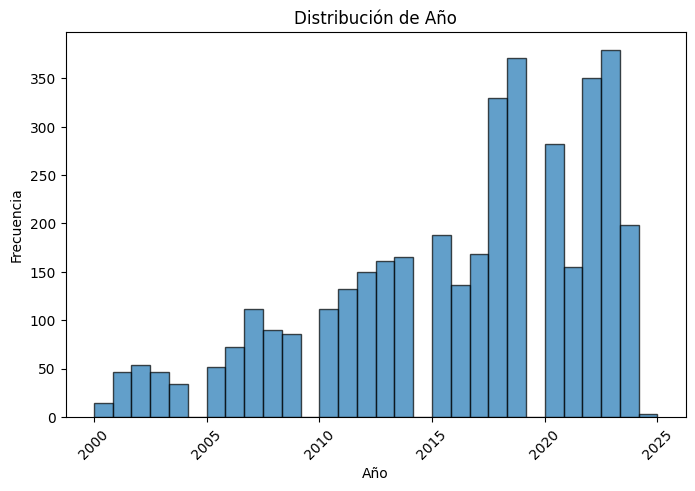

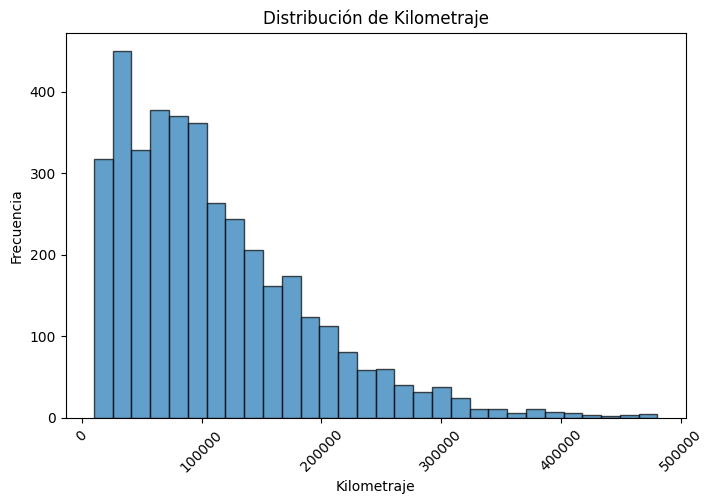

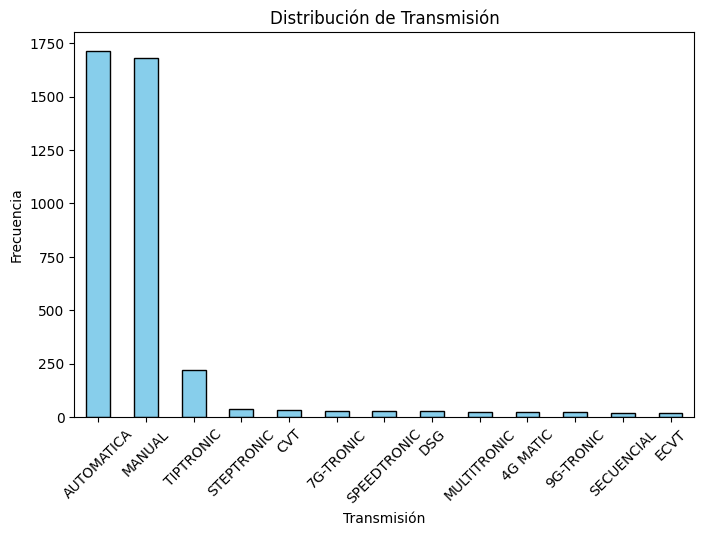

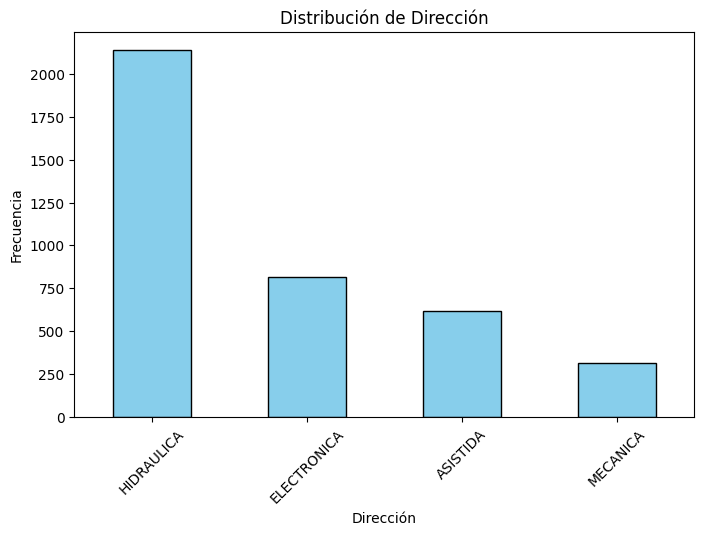

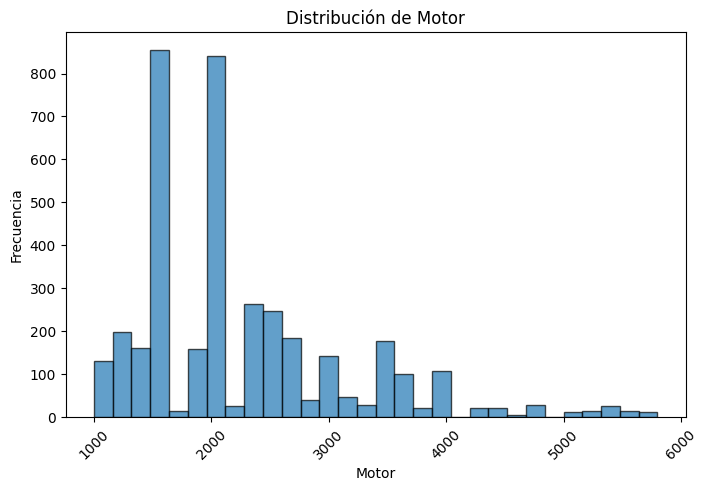

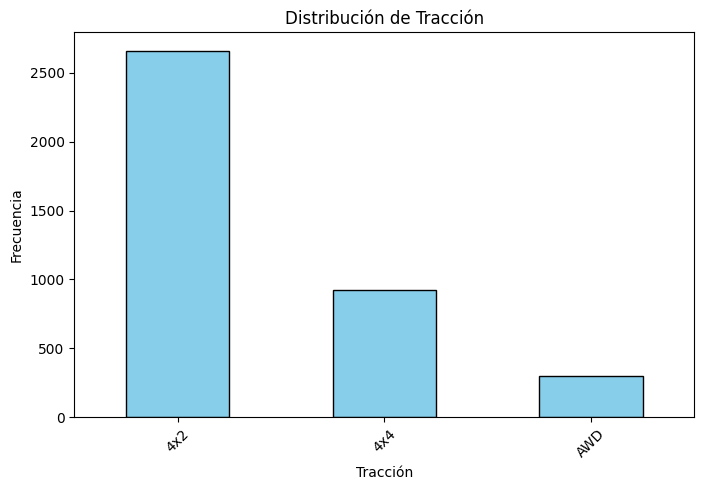

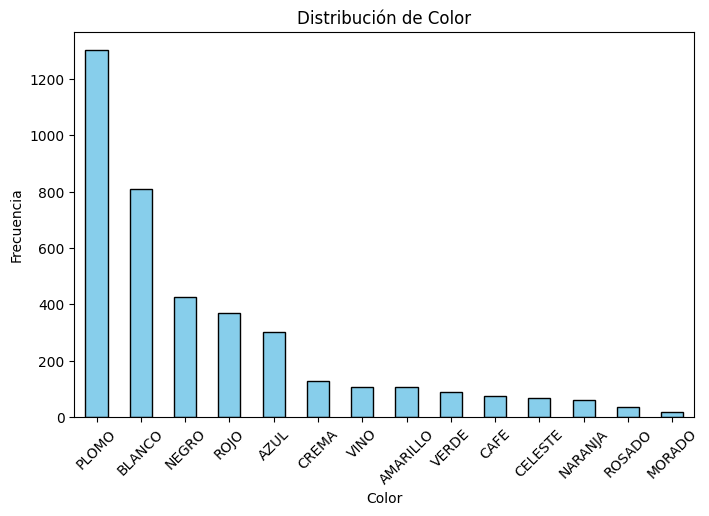

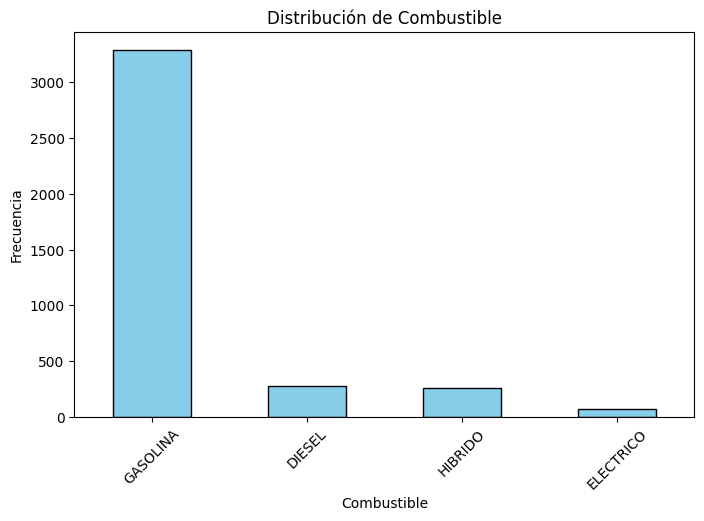

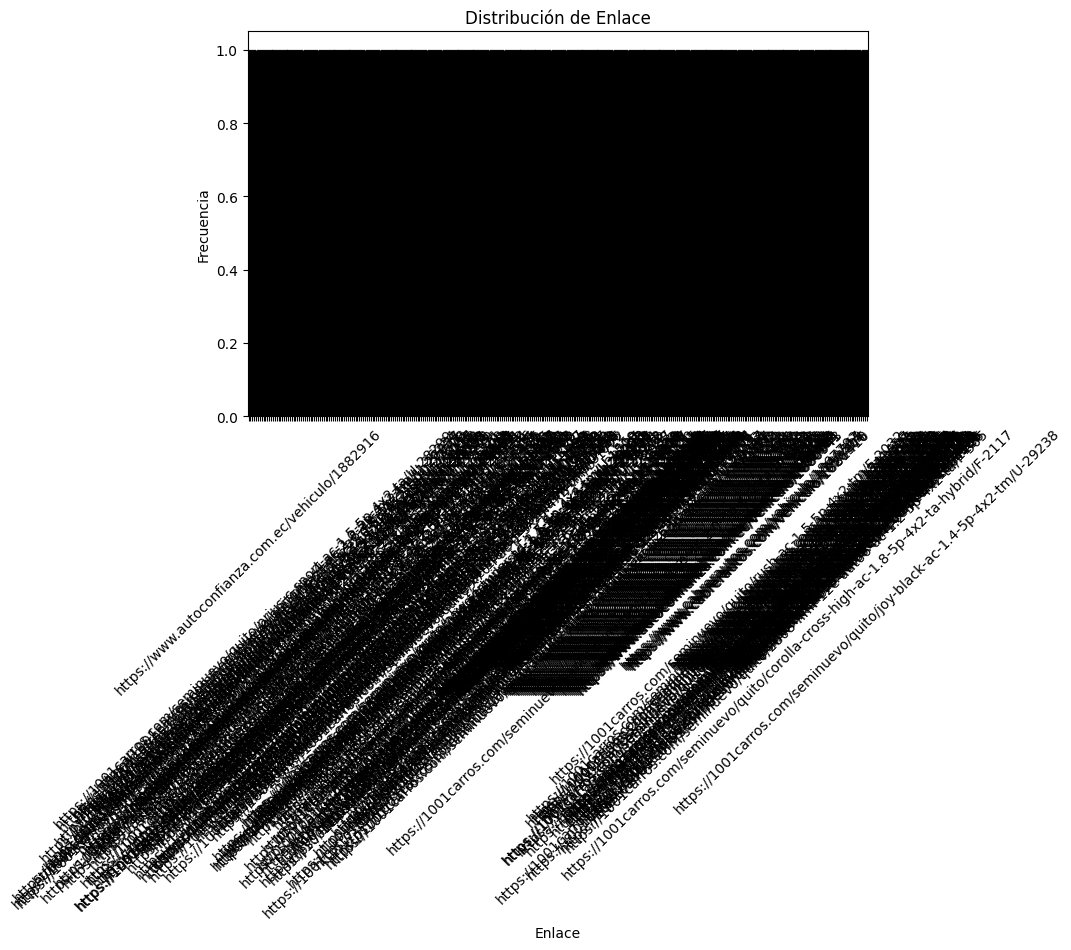

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame (reemplaza 'archivo_modificado.csv' con el nombre real si es necesario)
df = pd.read_csv('data/archivo_unido_FINAL3.csv')

# Configurar el tamaño de las figuras
plt.rcParams["figure.figsize"] = (8, 5)

# Iterar sobre todas las columnas del DataFrame y graficar la distribución
for columna in df.columns:
    plt.figure()  # Crear una nueva figura para cada gráfico
    
    # Si la columna es numérica, usar histograma
    if df[columna].dtype in ['int64', 'float64']:
        plt.hist(df[columna].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.xlabel(columna)
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {columna}")
    
    # Si la columna es categórica, usar gráfico de barras
    else:
        df[columna].value_counts().plot(kind="bar", color="skyblue", edgecolor='k')
        plt.xlabel(columna)
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {columna}")
    
    # Mostrar el gráfico
    plt.xticks(rotation=45)
    plt.show()


C:\Users\SEBPE\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


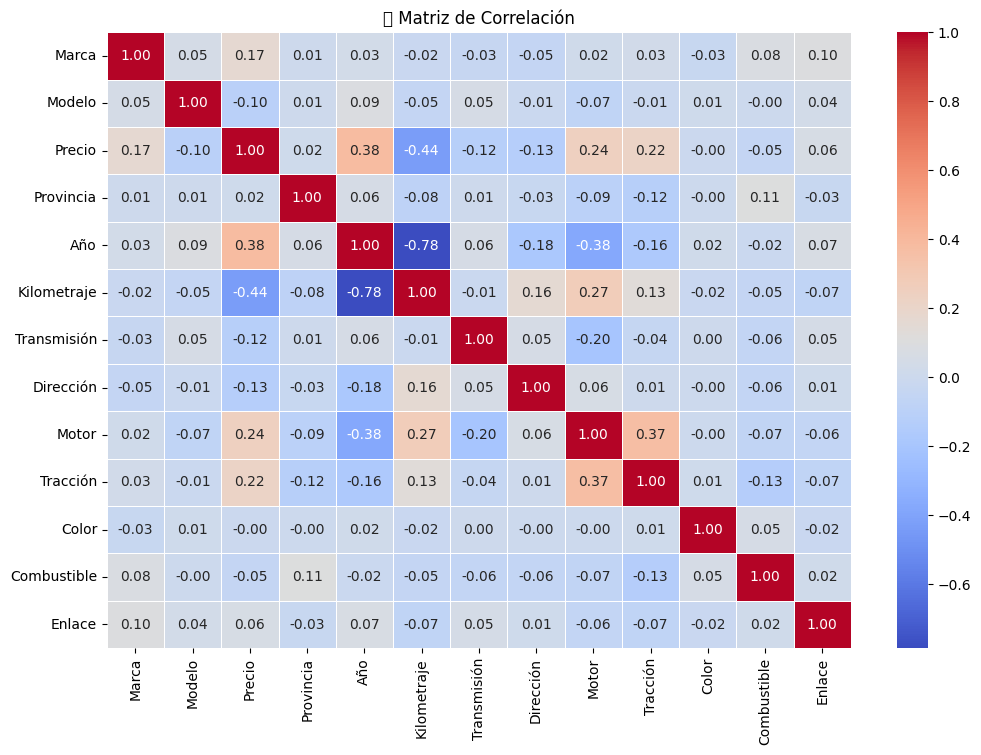

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 CARGA TU DATASET (REEMPLAZA CON TU ARCHIVO REAL)
df = pd.read_csv("data/archivo_unido_FINAL3.csv")  # Asegúrate de poner la ruta correcta

# 🔹 CONVERTIR VARIABLES CATEGÓRICAS A NÚMEROS (SI ES NECESARIO)
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes  # Convierte las categorías a números

# 🔹 CALCULAR MATRIZ DE CORRELACIÓN
corr_matrix = df_encoded.corr()

# 🔹 GRAFICAR MATRIZ DE CORRELACIÓN
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔹 Matriz de Correlación")
plt.show()



In [45]:
#!pip install matplotlib


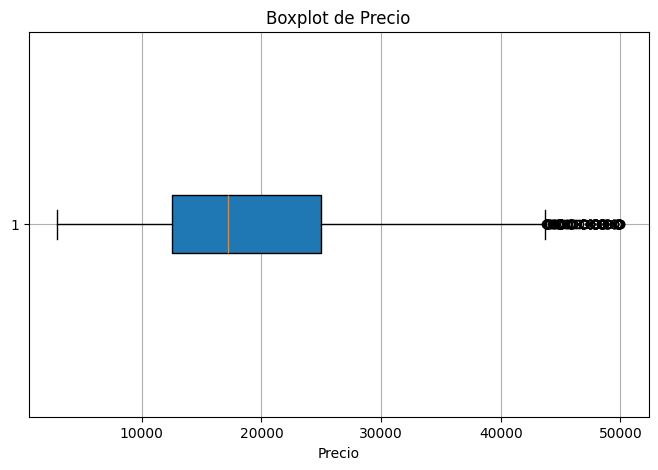

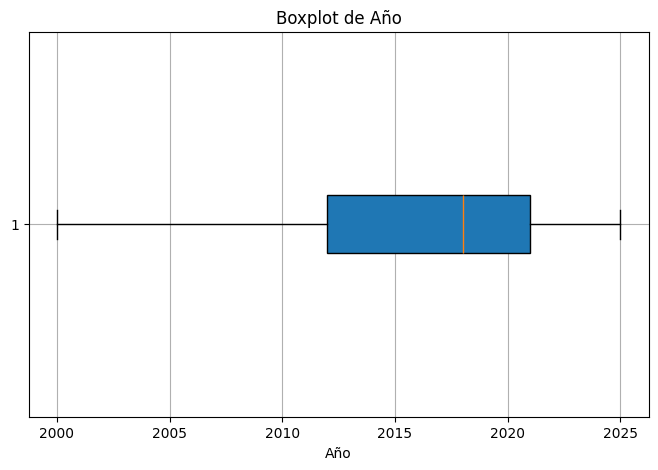

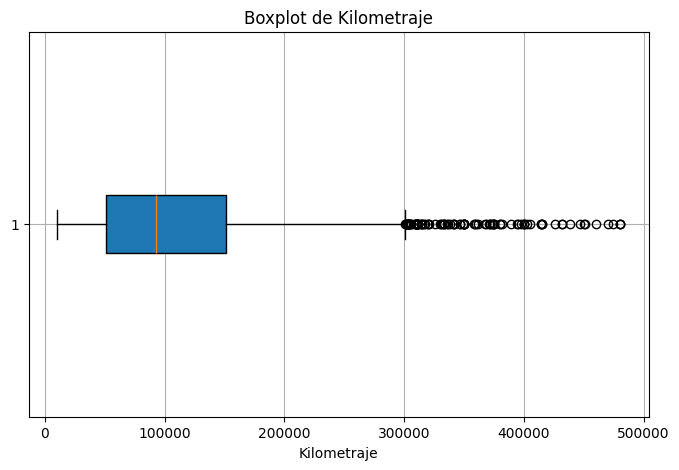

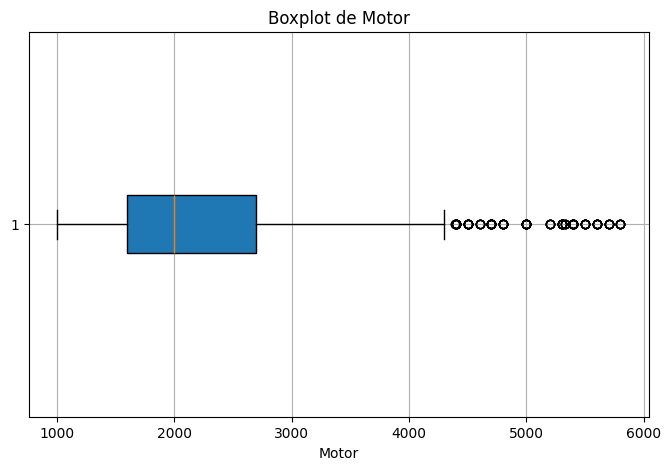

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame limpio
df = pd.read_csv('data/archivo_unido_FINAL3.csv')

# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Crear un boxplot para cada columna numérica
for columna in df_numerico.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df_numerico[columna].dropna(), vert=False, patch_artist=True)
    plt.xlabel(columna)
    plt.title(f"Boxplot de {columna}")
    plt.grid(True)
    plt.show()


In [4]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('data/archivo_unido_FINAL3.csv')

# Ver estadísticas descriptivas de la columna "Kilometraje"
print("Estadísticas de Precio:")
print(df["Precio"].describe())

# Mostrar algunos valores extremos
print("\nValores Extremos de Precio:")
print(df[["Precio"]].sort_values(by="Precio", ascending=False).head(10))



Estadísticas de Precio:
count     3886.000000
mean     20054.567679
std      10187.197914
min       2900.000000
25%      12500.000000
50%      17175.000000
75%      25000.000000
max      50000.000000
Name: Precio, dtype: float64

Valores Extremos de Precio:
       Precio
1671  50000.0
1328  49990.0
2091  49900.0
987   49900.0
3304  49900.0
2676  49900.0
3140  49900.0
2819  49900.0
2092  49900.0
2733  49900.0


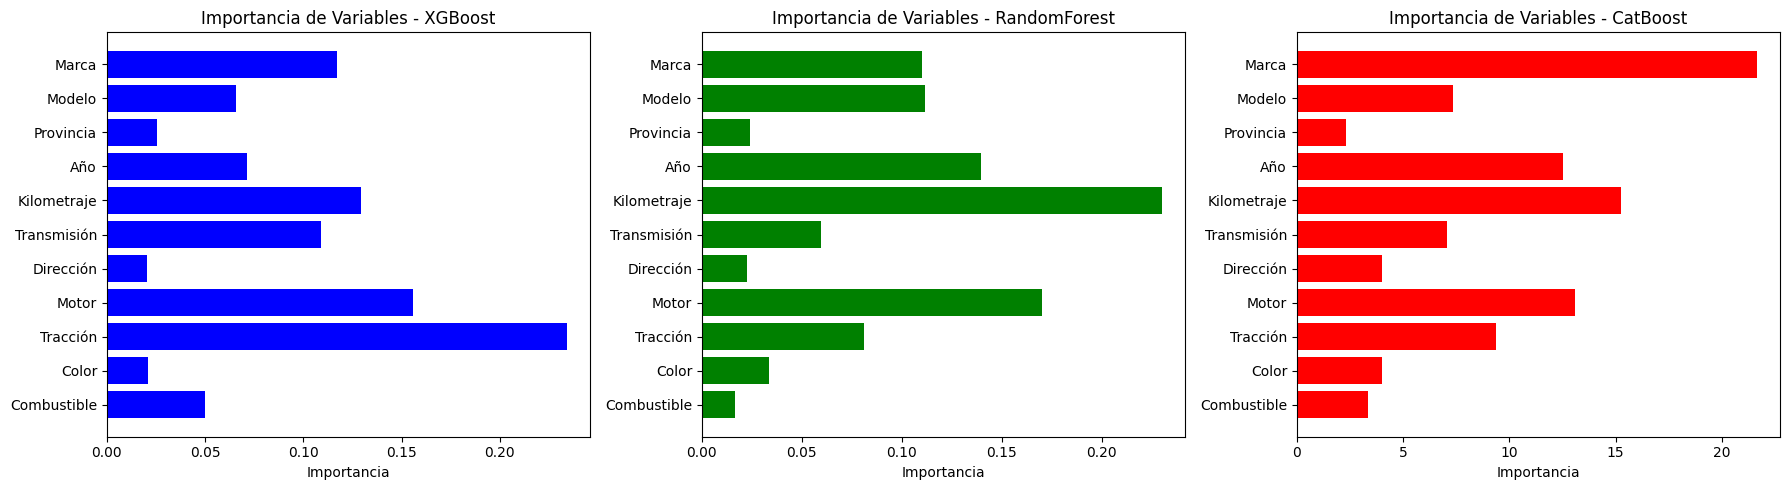

In [6]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir la lista de características utilizadas en los modelos
features = ['Marca', 'Modelo', 'Provincia', 'Año', 'Kilometraje', 
            'Transmisión', 'Dirección', 'Motor', 'Tracción', 'Color', 'Combustible']

# 2. Cargar los modelos entrenados
modelo_xgb = joblib.load('models/modelo_xgboost.pkl')
modelo_rf = joblib.load('models/modelo_random_forest.pkl')
modelo_cat = joblib.load('models/modelo_catboost.pkl')

# 3. Obtener la importancia de las características en cada modelo
xgb_importance = modelo_xgb.feature_importances_
rf_importance = modelo_rf.feature_importances_
cat_importance = modelo_cat.get_feature_importance()

# 4. Crear un DataFrame con la importancia de cada variable en cada modelo
df_importance = pd.DataFrame({
    'Feature': features,
    'XGBoost': xgb_importance,
    'RandomForest': rf_importance,
    'CatBoost': cat_importance
})

# 5. Visualizar la importancia de variables en gráficos de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# XGBoost
axes[0].barh(df_importance['Feature'], df_importance['XGBoost'], color='blue')
axes[0].set_title('Importancia de Variables - XGBoost')
axes[0].set_xlabel('Importancia')
axes[0].invert_yaxis()

# RandomForest
axes[1].barh(df_importance['Feature'], df_importance['RandomForest'], color='green')
axes[1].set_title('Importancia de Variables - RandomForest')
axes[1].set_xlabel('Importancia')
axes[1].invert_yaxis()

# CatBoost
axes[2].barh(df_importance['Feature'], df_importance['CatBoost'], color='red')
axes[2].set_title('Importancia de Variables - CatBoost')
axes[2].set_xlabel('Importancia')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()
